# **Rozkład $t$-Studenta** - $t(n)$
Zmienna losowa $X$ ma rozkład  $t$-Studenta o $n\in\mathbb{N_+}$ stopniach swobody, jeżeli jej gęstość $f$ jest postaci
$$
    f(x)=\frac{\Gamma(\frac{n+1}{2})}{\sqrt{n\pi}\Gamma(\frac{n}{2})}\Big(1+\frac{x^2}{n}\Big)^{-\frac{n+1}{2}} \quad \text{dla} \quad x\in\mathbb{R}.
$$

Wartość oczekiwana i wariancja, dla $n>2$, dane są wzorami
$$
    \mathbb{E}X = 0, \quad \text{Var}(X) = \frac{n}{n-2}.
$$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

### Zadanie
1. Zdefiniuj zmienną losową dla rozkładu $t$-Studenta.
2. Narysuj gęstość.
3. Narysuj dystrybuantę.
4. Wyznacz podstawowe charakterystyki rozkładu: średnia, wariancja, odchylenie standardowe.
5. Wylosuj $n$ obserwacji z zdefiniowanego rozkładu.
6. Narysujmy histogram dla wylosowanej powyżej próbki.

In [12]:
# 1. Rozkład prawdopodobieństwa
t1 = stats.t(df=10)  # dla 1 i 2 stopni swobody rozkład jest źle określony (nie posiada wszystkich statystyk)

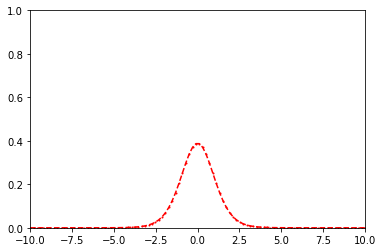

In [13]:
# 2. Gęstość

fig, ax = plt.subplots(1, 1)
ax.set_xlim([-10, 10])
ax.set_ylim([0, 1])

x_value = np.linspace(-10, 10, 100)
ax.plot(x_value, t1.pdf(x_value), 'ro--', ms=1, label='t(1) pdf')
plt.show()

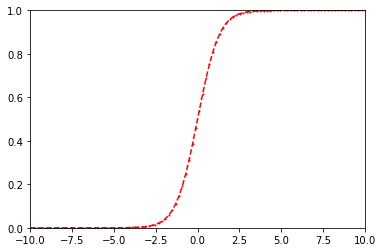

In [14]:
# 3. Dystrybuanta

fig, ax = plt.subplots(1, 1)
ax.set_xlim([-10, 10])
ax.set_ylim([0, 1])

x_value = np.linspace(-10, 10, 100)
ax.plot(x_value, t1.cdf(x_value), 'ro--', ms=1, label='t(1) pdf')
plt.show()

In [15]:
# 4. Podstawowe statystyki

print(t1.stats('mvsk'))
print(np.sqrt(t1.stats('v')))

(array(0.), array(1.25), array(0.), array(1.))
1.118033988749895


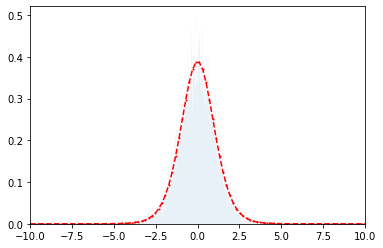

In [19]:
# 5. Próbka z rozkładu t-studenta i 6. Histogram

x = t1.rvs(10000)

fig, ax = plt.subplots(1, 1)

ax.hist(x,bins=1000, histtype='stepfilled', alpha=0.1, density=True)
ax.set_xlim([-10, 10])
x_value = np.linspace(-10, 10, 100)
ax.plot(x_value, t1.pdf(x_value), 'ro--', ms=1, label='t(1) pdf')

plt.show()
# aczkolwiek zdarzają się wartości mocno oddalone od centrum (np. - 1000)

### Zadanie
1. Narysuj na jednym wykresie gęstości dla rozkładu t-Studenta dla stopni swobody z zakresu od 1 do 20.
2. Dorysuj wykres gęstości rozkładu normalnego standardowego
3. Wyciągnij wnioski

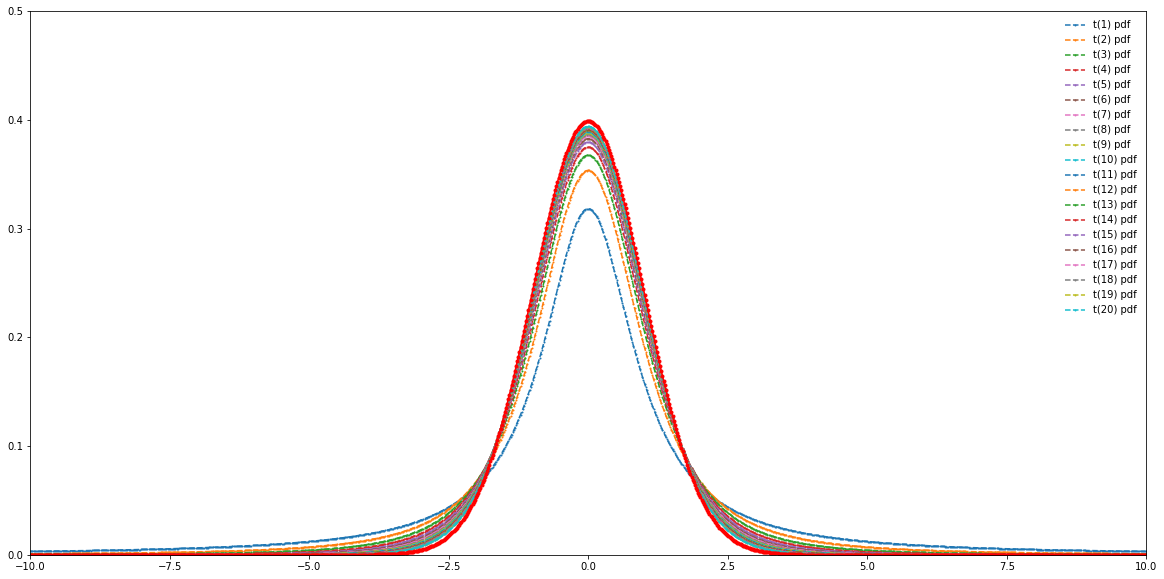

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_xlim([-10, 10])
ax.set_ylim([0, .5])
x_value = np.linspace(-10, 10, 1000)

for i in np.arange(1, 21):
    t = stats.t(df=i)
    ax.plot(x_value, t.pdf(x_value), 'o--', ms=1, label='t({}) pdf'.format(i))

norm01 = stats.norm(loc=0, scale=1)
ax.plot(x_value, norm01.pdf(x_value), 'ro-', ms=3, label='norm(0,1) pdf'.format(i))
ax.legend(loc='best', frameon=False)
plt.show()

### Zadanie - do domu
Sprawdzić empirycznie następujące własności:
1. Jeśli $X_1, \ldots, X_n$ będzie próbą z rozkładu normalnego $\mathcal{N}(\mu,\sigma)$ to zmienna $Y=\frac{\overline{X}-\mu}{S}\sqrt{n}$ pochodzi z rozkładu $t$-Studenta z $n-1$ stopniami swobody.

**Wskazkówka**: $S^2=\frac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X})^2$.

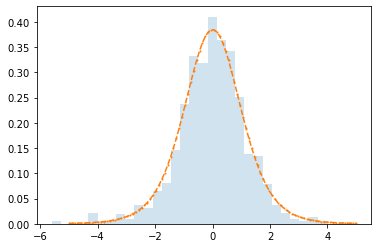

In [45]:
mu = 20
sigma = 5
n = 7

y_sample = []
for k in range(1000):
    
    x = stats.norm.rvs(size=n, loc=mu, scale=sigma)

    x_mean = np.mean(x)
    S = np.std(x, ddof=1)

    y = (x_mean - mu) * np.sqrt(n) / S
    y_sample.append(y)

plt.hist(y_sample, bins=30, histtype='stepfilled', alpha=0.2, density=True)

x_value = np.linspace(-5, 5, 100)
t = stats.t(df=n)
plt.plot(x_value, t.pdf(x_value), 'o--', ms=1, label='t(n-1) pdf')

plt.show()